In [37]:
import math
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
def load_graph(path):
    G = nx.Graph()
    with open(path) as text:
        for line in text:
            vertices = line.strip().split(" ")
            source = int(vertices[0])
            target = int(vertices[1])
            G.add_edge(source, target)
    return G


def clone_graph(G):
    cloned_g = nx.Graph()
    for edge in G.edges():
        cloned_g.add_edge(edge[0], edge[1])
    return cloned_g


def draw_pic(communities):
    print(len(communities))
    labels = range(1,len(communities)+1)
    fig,ax = plt.subplots()
    for x,y,lab in zip(communities,communities,labels):
        ax.scatter(x,y,label=lab)
    colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired
    colorst = [colormap(i) for i in np.linspace(0, 0.9,len(ax.collections))]
    for t,j1 in enumerate(ax.collections):
        j1.set_color(colorst[t])
   # ax.legend(fontsize='small')
    plt.show()


def draw_pic1(communities):
    print(len(communities))
    labels = range(1,len(communities)+1)
    fig,ax = plt.subplots()
    for i,x in enumerate(communities):
        for point in x:
            print(point)
            ax.scatter(point,point,label=i)
    colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired
    colorst = [colormap(i) for i in np.linspace(0, 0.9,len(ax.collections))]
    for t,j1 in enumerate(ax.collections):
        j1.set_color(colorst[t])
   # ax.legend(fontsize='small')
    plt.show()

<class 'dict_values'>
[0, 1, 3, 5, 7, 9, 10, 11, 12, 13, 15, 16, 18, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 33, 37, 38, 39, 40, 42, 43, 45, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 82, 83, 84, 85, 87, 88, 92, 94, 96, 97, 98, 100, 101, 103, 104, 105, 106, 109, 112, 113, 114, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 128, 129, 130, 132, 133, 134, 141, 142, 146, 148, 150, 153, 154, 155, 156, 157, 158, 160, 161, 163, 164, 165, 166, 168, 169, 170, 171, 172, 173, 174, 176, 178, 180, 182, 183, 185, 186, 187, 188, 189, 190, 191, 192, 194, 196, 199, 200, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 215, 217, 221, 222, 223, 224, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 242, 246, 247, 248, 249, 250, 252, 253, 254, 256, 257, 258, 260, 261, 265, 266, 267, 268, 269, 270, 271, 272, 274, 276, 277, 279, 280, 283, 285, 286, 287, 288, 290, 291, 292, 293, 294, 295, 297, 29

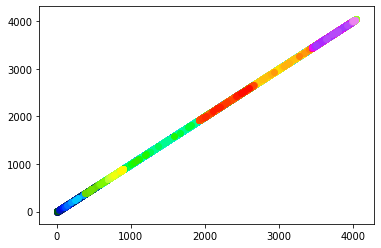

In [38]:

import collections
import random
import networkx as nx
from util.graph_helper import load_graph
from util.graph_helper import clone_graph
from util.modularity import cal_Q
'''
paper : <<Near linear time algorithm to detect community structures in large-scale networks>>
'''

class LPA():

    def __init__(self, G, max_iter = 20):
        self._G = G
        self._n = len(G.nodes()) #number of nodes
        self._max_iter = max_iter

    def can_stop(self):
        # all node has the label same with its most neighbor
        for i in range(self._n):
            node = self._G.nodes[i]
            label = node["label"]
            max_labels = self.get_max_neighbor_label(i)
            if(label not in max_labels):
                return False
        return True

    def get_max_neighbor_label(self,node_index):
        m = collections.defaultdict(int)
        for neighbor_index in self._G.neighbors(node_index):
            neighbor_label = self._G.nodes[neighbor_index]["label"]
            m[neighbor_label] += 1
        max_v = max(m.values())
        return [item[0] for item in m.items() if item[1] == max_v]


    '''asynchronous update'''
    def populate_label(self):
        #random visit
        visitSequence = random.sample(self._G.nodes(),len(self._G.nodes()))
        for i in visitSequence:
            node = self._G.nodes[i]
            label = node["label"]
            max_labels = self.get_max_neighbor_label(i)
            if(label not in max_labels):
                newLabel = random.choice(max_labels)
                node["label"] = newLabel

    def get_communities(self):
        communities = collections.defaultdict(lambda:list())
        for node in self._G.nodes(True):
            label = node[1]["label"]
            communities[label].append(node[0])
        return communities.values()

    def execute(self):
        #initial label
        for i in range(self._n):
            self._G.nodes[i]["label"] = i
        iter_time = 0
        #populate label
        while(not self.can_stop() and iter_time<self._max_iter):
            self.populate_label()
            iter_time += 1
        return self.get_communities()


if __name__ == '__main__':
    G = load_graph(r'G:\研一\www\hw\hw2\dataset\facebook_combined.txt')
    algorithm = LPA(G)
    communities = algorithm.execute()
    print(type(communities))
    for community in communities:
        print(community)
    draw_pic(communities)

<class 'list'>
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 22

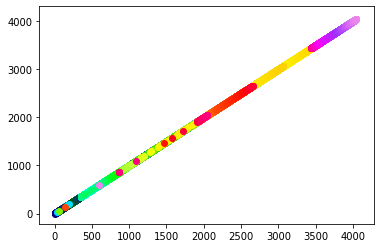

In [39]:
# coding=utf-8
import collections
import string
import random

'''
    paper : <<Fast unfolding of communities in large networks>>
'''

def load_graph1(path):
    G = collections.defaultdict(dict)
    with open(path) as text:
        for line in text:
            vertices = line.strip().split()
            v_i = int(vertices[0])
            v_j = int(vertices[1])
            G[v_i][v_j] = 1.0
            G[v_j][v_i] = 1.0
    return G

class Vertex():

    def __init__(self, vid, cid, nodes, k_in=0):
        self._vid = vid
        self._cid = cid
        self._nodes = nodes
        self._kin = k_in  #结点内部的边的权重

class Louvain():

    def __init__(self, G):
        self._G = G
        self._m = 0 #边数量
        self._cid_vertices = {} #需维护的关于社区的信息(社区编号,其中包含的结点编号的集合)
        self._vid_vertex = {}   #需维护的关于结点的信息(结点编号，相应的Vertex实例)
        for vid in self._G.keys():
            self._cid_vertices[vid] = set([vid])
            self._vid_vertex[vid] = Vertex(vid, vid, set([vid]))
            self._m += sum([1 for neighbor in self._G[vid].keys() if neighbor>vid])

    def first_stage(self):
        mod_inc = False  #用于判断算法是否可终止
        visit_sequence = list(self._G.keys())
        random.shuffle(visit_sequence)
        while True:
            can_stop = True #第一阶段是否可终止
            for v_vid in visit_sequence:
                v_cid = self._vid_vertex[v_vid]._cid
                k_v = sum(self._G[v_vid].values()) + self._vid_vertex[v_vid]._kin
                cid_Q = {}
                for w_vid in self._G[v_vid].keys():
                    w_cid = self._vid_vertex[w_vid]._cid
                    if w_cid in cid_Q:
                        continue
                    else:
                        tot = sum([sum(self._G[k].values())+self._vid_vertex[k]._kin for k in self._cid_vertices[w_cid]])
                        if w_cid == v_cid:
                            tot -= k_v
                        k_v_in = sum([v for k,v in self._G[v_vid].items() if k in self._cid_vertices[w_cid]])
                        delta_Q = k_v_in - k_v * tot / self._m  #由于只需要知道delta_Q的正负，所以少乘了1/(2*self._m)
                        cid_Q[w_cid] = delta_Q

                cid,max_delta_Q = sorted(cid_Q.items(),key=lambda item:item[1],reverse=True)[0]
                if max_delta_Q > 0.0 and cid!=v_cid:

                    self._vid_vertex[v_vid]._cid = cid
                    self._cid_vertices[cid].add(v_vid)
                    self._cid_vertices[v_cid].remove(v_vid)
                    can_stop = False
                    mod_inc = True
            if can_stop:
                break
        return mod_inc

    def second_stage(self):
        cid_vertices = {}
        vid_vertex = {}
        for cid,vertices in self._cid_vertices.items():
            if len(vertices) == 0:
                continue
            new_vertex = Vertex(cid, cid, set())
            for vid in vertices:
                new_vertex._nodes.update(self._vid_vertex[vid]._nodes)
                new_vertex._kin += self._vid_vertex[vid]._kin
                for k,v in self._G[vid].items():
                    if k in vertices:
                        new_vertex._kin += v/2.0
            cid_vertices[cid] = set([cid])
            vid_vertex[cid] = new_vertex

        G = collections.defaultdict(dict)
        for cid1,vertices1 in self._cid_vertices.items():
            if len(vertices1) == 0:
                continue
            for cid2,vertices2 in self._cid_vertices.items():
                if cid2<=cid1 or len(vertices2)==0:
                    continue
                edge_weight = 0.0
                for vid in vertices1:
                    for k,v in self._G[vid].items():
                        if k in vertices2:
                            edge_weight += v
                if edge_weight != 0:
                    G[cid1][cid2] = edge_weight
                    G[cid2][cid1] = edge_weight

        self._cid_vertices = cid_vertices
        self._vid_vertex = vid_vertex
        self._G = G


    def get_communities(self):
        communities = []
        for vertices in self._cid_vertices.values():
            if len(vertices) != 0:
                c = set()
                for vid in vertices:
                    c.update(self._vid_vertex[vid]._nodes)
                communities.append(c)
        return communities

    def execute(self):
        iter_time = 1
        while True:
            iter_time += 1
            mod_inc = self.first_stage()
            if mod_inc:
                self.second_stage()
            else:
                break
        return self.get_communities()


if __name__ == '__main__':
    G = load_graph1(r'G:\研一\www\hw\hw2\dataset\facebook_combined.txt')
    algorithm = Louvain(G)
    communities = algorithm.execute()
    print(type(communities))
    for c in communities:
        print (c)
    draw_pic1(communities)

community:  [2670, 2699, 2703, 2879, 2889, 2959, 2972, 2982, 3008, 3283, 3309, 3311, 3314, 3318, 3325, 3382, 3423]
community:  [580, 930, 936, 948, 1113, 1122, 1142, 1179, 1300, 1318, 1320, 1332, 1349, 1358, 1374, 1512, 1514, 1565, 1574, 1606, 1616, 1625, 1645, 1695, 1740, 1763, 1766, 1773, 1801, 1844, 1882]
community:  [916, 925, 946, 947, 952, 953, 960, 966, 980, 983, 993, 997, 1004, 1006, 1017, 1024, 1040, 1059, 1076, 1078, 1079, 1083, 1086, 1101, 1107, 1117, 1125, 1126, 1132, 1146, 1153, 1160, 1163, 1173, 1181, 1184, 1185, 1198, 1199, 1205, 1207, 1209, 1211, 1222, 1238, 1242, 1243, 1250, 1255, 1256, 1267, 1269, 1271, 1280, 1285, 1288, 1291, 1302, 1329, 1330, 1331, 1335, 1339, 1341, 1344, 1352, 1359, 1367, 1370, 1375, 1376, 1377, 1380, 1390, 1391, 1399, 1416, 1420, 1431, 1447, 1456, 1457, 1467, 1471, 1483, 1488, 1491, 1509, 1516, 1522, 1530, 1547, 1551, 1554, 1557, 1559, 1570, 1584, 1589, 1597, 1598, 1600, 1603, 1604, 1610, 1612, 1613, 1619, 1621, 1622, 1623, 1662, 1663, 1665, 1668,

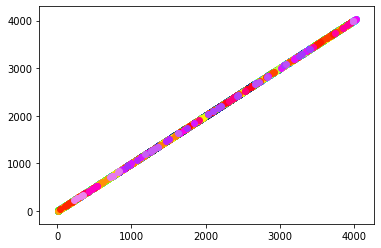

In [43]:
import math
def coefficient(node_i,node_j,G):
    '''
        paper : <<Defining and identifying communities in networks>>
    '''
    neighbors_i = set(nx.neighbors(G, node_i))
    neighbors_j = set(nx.neighbors(G, node_j))
    common = len(set(neighbors_i & neighbors_j))
    min_k = min(len(neighbors_i),len(neighbors_j))-1
    if(min_k == 0):
        return 1
    else:
        return common / min_k

def cal_similarity(G, node_i, node_j):
    '''
        paper : <<SCAN:A Structural Clustering Algorithm for Networks>>
    '''
    s1 = set(G.neighbors(node_i))
    s1.add(node_i)
    s2 = set(G.neighbors(node_j))
    s2.add(node_j)
    return len(s1 & s2) / math.sqrt(len(s1) * len(s2))
class SCAN():

    def __init__(self, G, epsilon=0.5, mu=3):
        self._G = G
        self._epsilon = epsilon
        self._mu = mu

    def get_epsilon_neighbor(self, node):
        return [neighbor for neighbor in self._G.neighbors(node) if cal_similarity(self._G,node, neighbor) >= self._epsilon]

    def is_core(self, node):
        return len(self.get_epsilon_neighbor(node)) >= self._mu

    def get_hubs_outliers(self, communities):
        other_nodes = set(self._G.nodes.keys())
        node_community = {}
        for i,c in enumerate(communities):
            for node in c:
                other_nodes.discard(node)
                node_community[node] = i
        hubs = []
        outliers = []
        for node in other_nodes:
            neighbors = self._G.neighbors(node)
            neighbor_community = set()
            for neighbor in neighbors:
                if neighbor in node_community:
                    neighbor_community.add(node_community[neighbor])
            if len(neighbor_community) > 1:
                hubs.append(node)
            else:
                outliers.append(node)
        return hubs,outliers

    def execute(self):
        # random scan nodes
        visit_sequence = list(self._G.nodes.keys())
        random.shuffle(visit_sequence)
        communities = []
        for node_name in visit_sequence:
            node = self._G.nodes[node_name]
            if(node.get("classified") == True):
                continue
            if(self.is_core(node_name)):  # a new community
                community = [node_name]
                communities.append(community)
                node["type"] = "core"
                node["classified"] = True
                queue = self.get_epsilon_neighbor(node_name)
                while(len(queue) != 0):
                    temp = queue.pop(0)
                    if(self._G.nodes[temp].get("classified") != True):
                        self._G.nodes[temp]["classified"] = True
                        community.append(temp)
                    if(not self.is_core(temp)):
                        continue
                    R = self.get_epsilon_neighbor(temp)
                    for r in R:
                        node_r = self._G.nodes[r]
                        is_classified = node_r.get("classified")
                        if(is_classified):
                            continue
                        node_r["classified"] = True
                        community.append(r)
                        if(node_r.get("type") != "non-member"):
                            queue.append(r)
                        else:
                            node["type"] = "non-member"
        return communities

if __name__ == '__main__':
    G = load_graph(r'G:\研一\www\hw\hw2\dataset\facebook_combined.txt')

    #print G.node.keys()

    #G = nx.karate_club_graph()

    algorithm = SCAN(G, 0.7, 3)
    communities = algorithm.execute()

    for community in communities:
        print ('community: ', sorted(community))
    draw_pic(communities)
    hubs_outliers = algorithm.get_hubs_outliers(communities)
    print ('hubs: ', hubs_outliers[0])
    print ('outliers: ', hubs_outliers[1])

